# Point operations


## Exercises

1. Show the histogram for the two modified images from the lab (`newim` and `newim2`).  (Copy the code for calculating `newim` and `newim2` here.)  Explain how the histogram shows visually how the colors have been transformed.  

*Note: put your text response in a text/Markdown cell, not in code comments.*

In [18]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import skimage

im = imageio.imread('love_and_peace.jpg')

im = im.astype('float32')/255
channels = ['red','green','blue']

newim = im.copy()
newim[...,0] *= 1.25
newim[...,1] /= 1.25
newim[...,2] /= 1.25
newim = np.clip(newim,0,1)

mask = im[...,0]>0.5

newim2 = im.copy()
newim2[mask,0] /= 1.25
newim2[mask,1] *= 1.25
newim2[mask,2] *= 1.25
newim2 = np.clip(newim2,0,1)

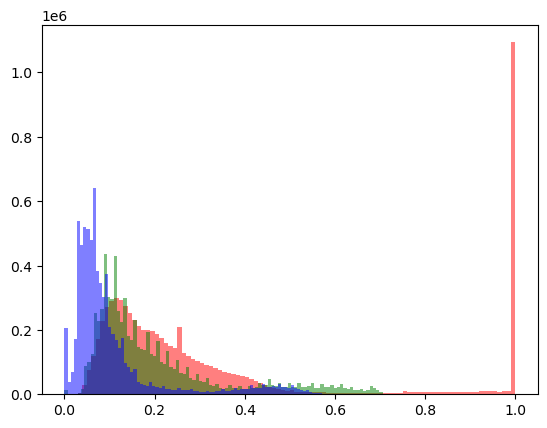

In [19]:
for i,channel in enumerate(channels):
    plt.hist(newim[:,:,i].flatten(),bins=100,color=channel,alpha=0.5)
plt.show()

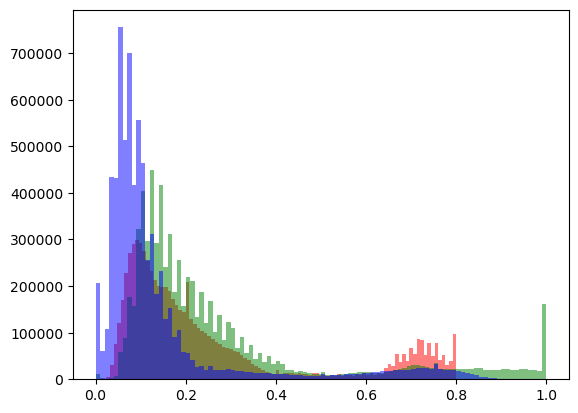

In [20]:
for i,channel in enumerate(channels):
    plt.hist(newim2[:,:,i].flatten(),bins=100,color=channel,alpha=0.5)
plt.show()

The first image, in which the red channel's values were increased, shows a histogram with more red pixel values than blue and green. The second image shows a histogram with more blue and green pixel values than red.

2. Invert the image (compute one minus the image).  What does this do to the colors in the image?

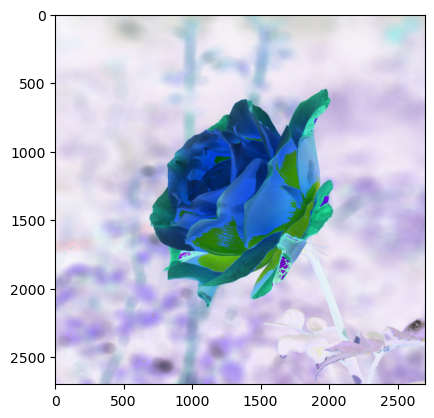

In [22]:
im = imageio.imread('love_and_peace.jpg')
plt.imshow(1-im)

3. Load the "hand" image (`hand.jpg`) and show it.  Show the three color channels separately.

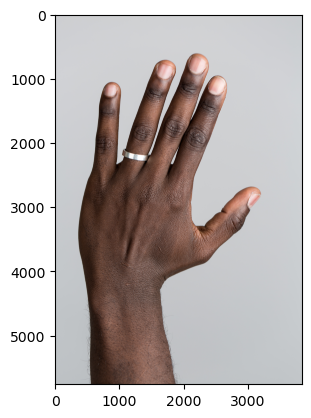

In [35]:
hand = imageio.imread('hand.jpg')
plt.imshow(hand)

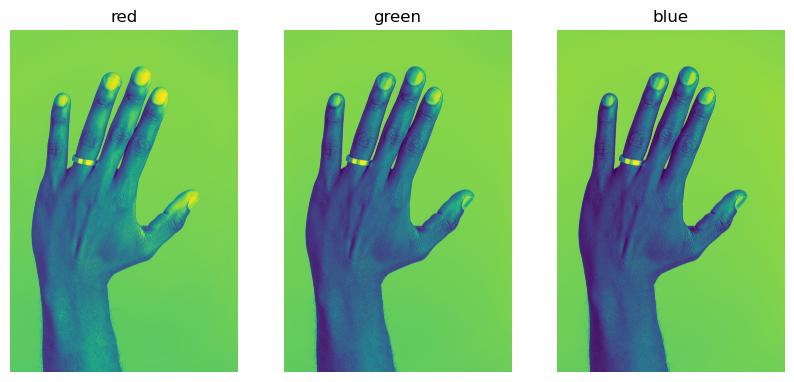

In [24]:
fig,axes = plt.subplots(1,3,figsize=(10,20))

channels = ['red','green','blue']
for i,(ax,channel) in enumerate(zip(axes,channels)):
    ax.imshow(hand[...,i])
    ax.axis('off')
    ax.set_title(channel)

4. Now convert the image to the [Hue Saturation Value](https://en.wikipedia.org/wiki/HSL_and_HSV) colorspace (see [`skimage.color.rgb2hsv`](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html)).    Show each channel of the HSV image.  



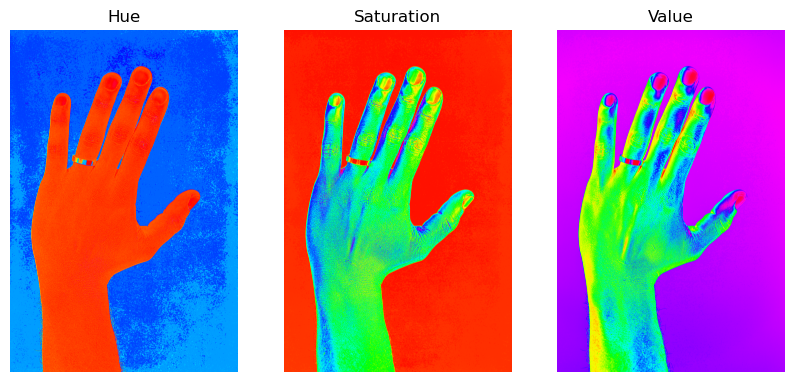

In [37]:
from skimage.color import rgb2hsv
hsv_hand = skimage.color.rgb2hsv(hand)

fig,axes = plt.subplots(1,3,figsize=(10,20))
channels = ['Hue','Saturation','Value']
for i,(ax,channel) in enumerate(zip(axes,channels)):
    ax.imshow(hsv_hand[...,i], cmap='hsv')
    ax.axis('off')
    ax.set_title(channel)


5. We want to separate the image into foreground (hand) and background using a threshold on one of the color channels.  All values greater than the threshold will be classified as foreground, and all othe values will be classified as background.

Would it be easier to separate this image into foreground and background using one of the RGB channels, or one of the HSV channels?

Look at the histogram for each channel to identify a good channel and threshold value for separating the image into foreground and background.  Apply the threshold and show the Boolean mask to evaluate the results.

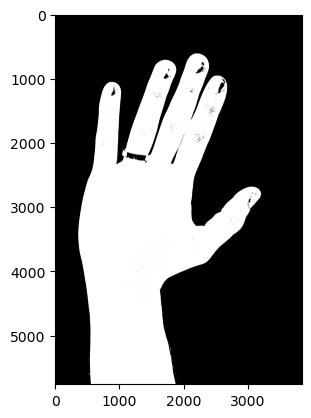

In [39]:
mask = hsv_hand[...,1]>0.1
plt.imshow(mask, cmap='gray')

The RGB channels have too much overlap. The HSV channels have more distinction between foreground and background.